In [76]:
import matplotlib.pyplot as plt
import requests
from scipy import stats
import pandas as pd
from config import weather_api_key
import numpy as np
from scipy.interpolate import interp1d
from datetime import datetime
import matplotlib.dates as mdates
import pytz
import calendar

In [77]:
#http://api.openweathermap.org/data/2.5/air_pollution/history?lat=40.7826&lon=-73.9656&start=1656680445&end=1659272445&appid=155db15cf89682a55503d94f25dc4deb
url = "http://api.openweathermap.org/data/2.5/air_pollution/history"
city = "New York"
cnt = "7" #number of forecast days
units = "imperial"
lon = "-73.9656"
lat = "40.7826"
start = "1641013200" 
end = "1672549140"
#https://api.openweathermap.org/data/2.5/forecast/daily?lat=40.7826&lon=-73.9656&cnt=7&units=imperial&appid=155db15cf89682a55503d94f25dc4deb

final_url = url + "?lat=" + lat + "&lon=" + lon + "&start=" + start + "&end=" + end + "&appid=" + weather_api_key
print(final_url)

http://api.openweathermap.org/data/2.5/air_pollution/history?lat=40.7826&lon=-73.9656&start=1641013200&end=1672549140&appid=155db15cf89682a55503d94f25dc4deb


In [78]:
aqi_num = requests.get(final_url).json()

In [81]:
aqi = []
time_stamp = []
ts = []

for day in range(8591):
    aqi.append(aqi_num['list'][day]['main']['aqi'])
    time_stamp.append(aqi_num['list'][day]['dt'])
    
for time in time_stamp:
    ts.append(datetime.fromtimestamp(time).strftime("%H"))

In [93]:
aqi_df = pd.DataFrame({
    "Time Stamp": time_stamp,
    "Human Time": ts,
    "AQI": aqi
})

aqi_df[aqi_df["AQI"] == 5].count()

aqi_percentage = 479/8592
aqi_percentage * 100

5.5749534450651765

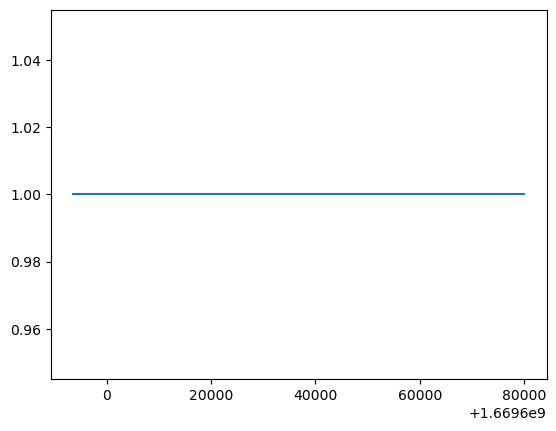

In [68]:
x = aqi_df["Time Stamp"]
y = aqi_df["AQI"]
plt.plot(x,y)